# project3_Experiment

In [52]:
pwd

u'/Users/jg/Documents/GitHub/DAT-DEN-03/projects/unit-projects/project-3/starter-code'

In [53]:
! conda install pandoc --yes

Fetching package metadata ...........
Solving package specifications: .

Package plan for installation in environment /Users/jg/anaconda:

The following NEW packages will be INSTALLED:

    pandoc: 1.19.2.1-ha5e8f32_1

pandoc-1.19.2. 100% |################################| Time: 0:00:02  14.29 MB/s       | ETA:  0:00:01  14.06 MB/s


In [55]:
! conda install TeX --yes

Fetching package metadata ...........

PackageNotFoundError: Packages missing in current channels:
            
  - tex

We have searched for the packages in the following channels:
            
  - https://repo.continuum.io/pkgs/main/osx-64
  - https://repo.continuum.io/pkgs/main/noarch
  - https://repo.continuum.io/pkgs/free/osx-64
  - https://repo.continuum.io/pkgs/free/noarch
  - https://repo.continuum.io/pkgs/r/osx-64
  - https://repo.continuum.io/pkgs/r/noarch
  - https://repo.continuum.io/pkgs/pro/osx-64
  - https://repo.continuum.io/pkgs/pro/noarch
            



In [34]:
import pandas as pd
import statsmodels.api as sm
import pylab as plt
import numpy as np

In [35]:
# read the data in
df = pd.read_csv("../assets/admissions.csv")

In [36]:
# take a look at the dataset
print df.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


In [37]:
# rename the 'rank' column because there is also a DataFrame method called 'rank'
df.columns = ["admit", "gre", "gpa", "prestige"]
print df.columns
# array([admit, gre, gpa, prestige], dtype=object)

Index([u'admit', u'gre', u'gpa', u'prestige'], dtype='object')


In [38]:
# summarize the data
print df.describe()

            admit         gre        gpa    prestige
count  400.000000  398.000000  398.00000  399.000000
mean     0.317500  588.040201    3.39093    2.486216
std      0.466087  115.628513    0.38063    0.945333
min      0.000000  220.000000    2.26000    1.000000
25%      0.000000  520.000000    3.13000    2.000000
50%      0.000000  580.000000    3.39500    2.000000
75%      1.000000  660.000000    3.67000    3.000000
max      1.000000  800.000000    4.00000    4.000000


In [39]:
# take a look at the standard deviation of each column
print df.std()
# admit      0.466087
# gre      115.516536
# gpa        0.380567
# prestige   0.944460

admit         0.466087
gre         115.628513
gpa           0.380630
prestige      0.945333
dtype: float64


In [40]:
# frequency table cutting presitge and whether or not someone was admitted
print pd.crosstab(df['admit'], df['prestige'], rownames=['admit'])
# prestige   1   2   3   4
# admit                   
# 0         28  97  93  55
# 1         33  54  28  12

prestige  1.0  2.0  3.0  4.0
admit                       
0          28   97   93   55
1          33   53   28   12


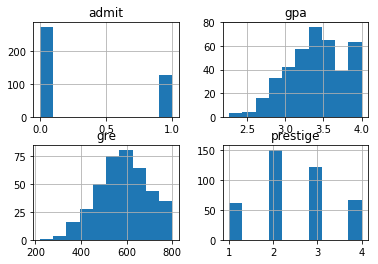

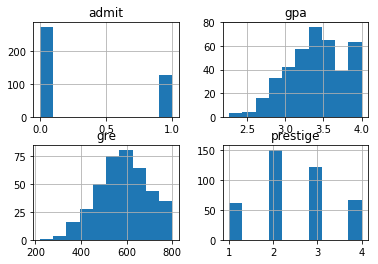

In [41]:
# plot all of the columns
df.hist()
plt.show()

In [42]:
# dummify rank
dummy_ranks = pd.get_dummies(df['prestige'], prefix='prestige')
print dummy_ranks.head()

   prestige_1.0  prestige_2.0  prestige_3.0  prestige_4.0
0             0             0             1             0
1             0             0             1             0
2             1             0             0             0
3             0             0             0             1
4             0             0             0             1


In [48]:
# create a clean data frame for the regression
cols_to_keep = ['admit', 'gre', 'gpa']
data = df[cols_to_keep].join(dummy_ranks.iloc[:, 1:])
print data.head()

   admit    gre   gpa  prestige_2.0  prestige_3.0  prestige_4.0
0      0  380.0  3.61             0             1             0
1      1  660.0  3.67             0             1             0
2      1  800.0  4.00             0             0             0
3      1  640.0  3.19             0             0             1
4      0  520.0  2.93             0             0             1


In [49]:
# manually add the intercept
data['intercept'] = 1.0

In [50]:
train_cols = data.columns[1:]
# Index([gre, gpa, prestige_2, prestige_3, prestige_4], dtype=object)

logit = sm.Logit(data['admit'], data[train_cols])

# fit the model
result = logit.fit()

Optimization terminated successfully.
         Current function value: nan
         Iterations 1


In [46]:
print result.summary()

                           Logit Regression Results                           
Dep. Variable:                  admit   No. Observations:                  400
Model:                          Logit   Df Residuals:                      400
Method:                           MLE   Df Model:                           -1
Date:                Thu, 14 Dec 2017   Pseudo R-squ.:                     nan
Time:                        13:32:27   Log-Likelihood:                    nan
converged:                       True   LL-Null:                       -249.99
                                        LLR p-value:                       nan
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
gre                 nan        nan        nan        nan         nan         nan
gpa                 nan        nan        nan        nan         nan         nan
prestige_2.0        nan        nan        na

In [29]:
# confidence interval of each coeffecient
print result.conf_int()

               0   1
gre          NaN NaN
gpa          NaN NaN
prestige_2.0 NaN NaN
prestige_3.0 NaN NaN
prestige_4.0 NaN NaN
intercept    NaN NaN


In [51]:
np.diag(result.cov_params())

array([ nan,  nan,  nan,  nan,  nan,  nan])